<a href="https://colab.research.google.com/github/subashree962004/SCT_ML_2/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
! pip install kaggle


In [28]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [29]:
!mkdir ~/.kaggle

In [30]:
! cp /content/drive/MyDrive/kaggle_API/kaggle.json.json ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/kaggle_API/kaggle.json.json': No such file or directory


In [31]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [32]:
! kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
! unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
replace Mall_Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [34]:
import pandas as pd
# Load the csv file
Mall_Customers=pd.read_csv('/content/Mall_Customers.csv')
print(Mall_Customers.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [35]:
print(Mall_Customers.shape)

(200, 5)


In [36]:
print(Mall_Customers.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [37]:
print(Mall_Customers.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [38]:
print(Mall_Customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [39]:
x=Mall_Customers[['Age','Annual Income (k$)','Spending Score (1-100)']]
# standardize the Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [40]:
# import K-Means from sklearn
from sklearn.cluster import KMeans


In [41]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x_scaled)
clusters=kmeans.predict(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
Mall_Customers['Cluster']=clusters
print(Mall_Customers.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


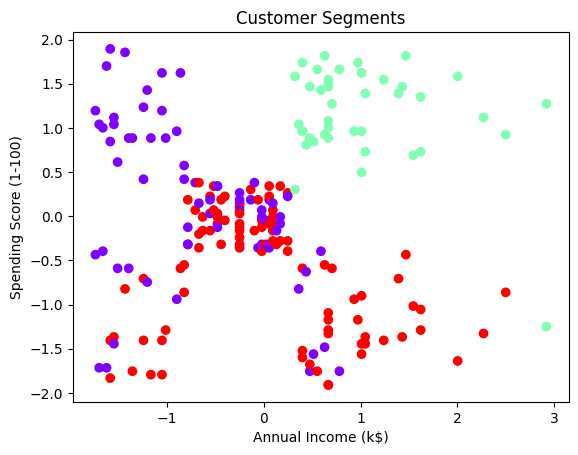

In [43]:
import matplotlib.pyplot as plt

plt.scatter(x_scaled[:,1],x_scaled[:,2],c=clusters,cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()


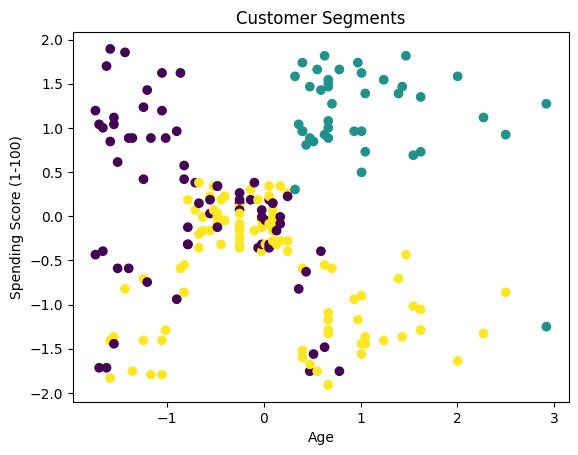

In [44]:
plt.scatter(x_scaled[:,1],x_scaled[:,2],c=clusters,cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

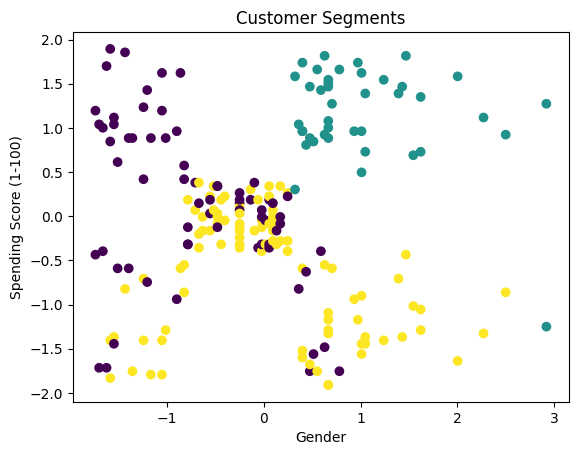

In [45]:
plt.scatter(x_scaled[:,1],x_scaled[:,2],c=clusters,cmap='viridis')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

In [46]:
print(kmeans.cluster_centers_)

[[-0.93381128 -0.67979753  0.1338202 ]
 [-0.43033758  1.02223317  1.15593564]
 [ 0.8916814   0.04741398 -0.62080368]]


In [47]:
print(Mall_Customers.groupby('Cluster').mean(numeric_only=True))

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         60.573529  25.838235           42.750000               53.647059
1        161.951220  32.853659           87.341463               79.975610
2        102.648352  51.274725           61.802198               34.208791


In [48]:
Mall_Customers.to_csv('Mall_Customers_with_clusters.csv',index=False)

In [49]:
from google.colab import files
files.download('Mall_Customers_with_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>